# Разбиение на тестовую и обучающую выборку в Python

Задача:  разбить набо данных на обучающую и тестовую выборки

In [3]:
%pylab inline
 # Данные и визуализация
import matplotlib.pyplot as plt # графики
import numpy as np # Мат. Функции
import pandas as pd # Таблицы
import statsmodels.api as sm # статическое моделирование
import statsmodels.formula.api as smf # Более удобное задание моделей
from statsmodels.graphics.api import abline_plot # Добавление линий регрессии на графики
import patsy # Преобразование данных в формат подходящий для статического моделирования
import seaborn as sns # красивенькие графики
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None) # читабельные графики seaborn
import sklearn as skl #Машинное обучение

Populating the interactive namespace from numpy and matplotlib


In [4]:
file = "spambase.csv"

spam = pd.read_csv(file)
print(spam.info())
print(spam['class'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Вариант решения

### Использовать **pandas**

In [7]:
spamtrain = spam.sample(frac = 0.67, random_state = 1066) #случайная выборка из набора данных spam составляющая 67 процентов от основного объема данных

spamtest = spam.drop(spamtrain.index) #удаление из набора данных всех строк которые были выбраны для spamtrain
print(spamtrain['class'].count()) # подтверждение что данные разделены правильно
print(spamtest['class'].count()) # вывод кол-ва классов в тестовом наборе
print(spam['class'].count()) # вывод общего кол-ва классов в исходном наборе данных spam

3083
1518
4601


## Вариант решения

### Использовать **train_test_split** из **sklearn.model_selection**

In [8]:
from sklearn.model_selection import train_test_split #деление на обучающую и тестовую выборку
import pandas as pd

df = pd.read_csv("north_korea_missile_test_database.csv")
y = df["Missile Name"] # извлечение столбца и сохранение его в переменной y
X = df.drop("Missile Name", axis=1) #удаление столбца и сохранение оставшихся данных в переменной x
X_train, X_test, y_train, y_test = train_test_split( # 80% данных будет использоваться для обучения (X_train, y_train), а 20% - для тестирования (X_test, y_test).
    X, y, test_size=0.2, random_state=31 # Устанавливает размер тестовой выборки в 20% и фиксирует случайное состояние для воспроизводимости.
)

In [17]:
X_train, X_val, y_train, y_val = train_test_split( # Использует текущие обучающие данные X_train и y_train для дальнейшего разделения.
    X_train, y_train, test_size=0.25, # Устанавливает размер валидационной выборки в 25% от текущей обучающей выборки
    random_state=31# Фиксирует случайное состояние для обеспечения воспроизводимости результатов.
)

In [15]:
len(X_train)

56

In [12]:
len(X_val)

19

In [13]:
len(X_test)

27

In [18]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

42
42
14
14
27
27


# Задания:
1. Подготовить pandas dataframe на основе "сырых" данных - https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/ **spambase.data spambase.names**
2. Провести его анализ на предмет сбалансированности классов.
3. Произвести разбиение на тестовую обучающую выборку с использованием https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html **sklearn.model_selection.StratifiedShuffleSplit** в соотношении **80/20**, **70/30**


In [20]:
import pandas as pd


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Названия столбцов из spambase.names
columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "spam_class"
]

# Загрузка данных в DataFrame
data = pd.read_csv(url, header=None, names=columns)  # Загрузка данных с указанными названиями столбцов.

print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

Распределение классов:
spam_class
0    0.605955
1    0.394045
Name: proportion, dtype: float64


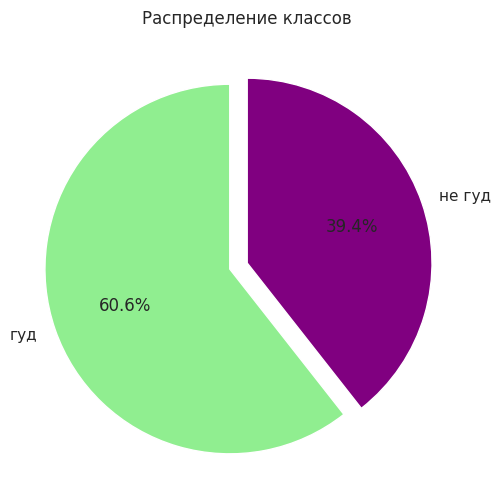

In [21]:
# Распределение классов
# Вычисляем распределение классов в столбце 'class' и нормализуем значения, чтобы получить доли
distribution = data['spam_class'].value_counts(normalize=True)

print("Распределение классов:")
print(distribution)


import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))# Строим столбчатую диаграмму для визуализации распределения классов
plt.pie(
    distribution,
    labels=['гуд', 'не гуд'], #названия
    autopct='%1.1f%%', # отображение процентов
    colors=['lightgreen', 'purple'], # цвета
    startangle=90, # начальный угол построения для контроля поворота диаграммы
    explode=(0.1, 0) # выдвижание секторов для визуального акцента
)


plt.title("Распределение классов")


plt.show()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit


split_80_20 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split_70_30 = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Разбиение данных на обучающую и тестовую выборки (80/20)
for train_idx, test_idx in split_80_20.split(data, data['spam_class']):
    train_set_80_20 = data.iloc[train_idx]
    test_set_80_20 = data.iloc[test_idx]

# Разбиение данных на обучающую и тестовую выборки (70/30)
# Цикл для получения индексов обучающей и тестовой выборок с использованием метода split.
for train_idx, test_idx in split_70_30.split(data, data['spam_class']):
    train_set_70_30 = data.iloc[train_idx]
    test_set_70_30 = data.iloc[test_idx]


print("80:20:")
print(f"Обучающая : {train_set_80_20.shape}")
print(f"Тестовая : {test_set_80_20.shape}")

print("\n70:30:")
print(f"Обучающая : {train_set_70_30.shape}")
print(f"Тестовая : {test_set_70_30.shape}")

80:20:
Обучающая : (3680, 58)
Тестовая : (921, 58)

70:30:
Обучающая : (3220, 58)
Тестовая : (1381, 58)
